In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2022-09-21 22:02:32.093899: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [3]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [5]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

## Create Own Model

## iPhone8_I

In [6]:
# reading a data for class  label 0
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_8/iPhone8_I/calendar-app.cfile")
print(np.array(data))
X, Y = create_dataset(data, 0)

print(X.shape)
print(Y.shape)

[0.015625 +0.j        0.0234375+0.0078125j 0.015625 +0.0078125j ...
 0.0234375+0.0078125j 0.0078125+0.0078125j 0.015625 +0.0078125j]
2048
75193
(2048, 75193)
[0.02359843 0.01450121 0.00629716 ... 0.00507639 0.00605692 0.01434469]
(10000, 2048)
(10000,)


In [7]:
# reading a data for class  label 1
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_8/iPhone8_I/camera-photo.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 1)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[-0.0078125-0.015625j   0.03125  +0.0078125j  0.0078125+0.015625j  ...
  0.03125  +0.015625j   0.03125  -0.015625j   0.015625 +0.03125j  ]
2048
74718
(2048, 74718)
[0.02340776 0.01348814 0.00526938 ... 0.0034575  0.00560695 0.01365474]
(20000, 2048)
(20000,)


In [8]:
# reading a data for class  label 2
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_8/iPhone8_I/camera-video.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 2)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[ 0.015625 +0.j         0.015625 +0.j         0.015625 +0.0078125j ...
  0.03125  +0.0078125j -0.0078125+0.0078125j  0.0390625+0.j       ]
2048
80971
(2048, 80971)
[0.02337759 0.01389773 0.00623942 ... 0.00357345 0.00575555 0.013909  ]
(30000, 2048)
(30000,)


In [9]:
# reading a data for class  label 3
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_8/iPhone8_I/email-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 3)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0078125+0.0078125j 0.0078125-0.0078125j 0.0078125-0.0078125j ...
 0.0234375+0.j        0.0234375+0.03125j   0.015625 +0.015625j ]
2048
72121
(2048, 72121)
[0.02316895 0.01445583 0.00709031 ... 0.00398197 0.00594652 0.01437647]
(40000, 2048)
(40000,)


In [10]:
# reading a data for class  label 4
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_8/iPhone8_I/gallery-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 4)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 +0.0234375j 0.       +0.j        0.0234375+0.0390625j ...
 0.0234375+0.015625j  0.0078125+0.0078125j 0.03125  +0.0234375j]
2048
89261
(2048, 89261)
[0.02114244 0.01223788 0.00554262 ... 0.00337299 0.00464032 0.01173784]
(50000, 2048)
(50000,)


In [11]:
# reading a data for class  label 5
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_8/iPhone8_I/home-screen.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 5)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.0234375+0.j        0.0078125+0.j        0.0234375+0.0078125j ...
 0.0234375+0.0078125j 0.0078125-0.0234375j 0.015625 +0.0234375j]
2048
79686
(2048, 79686)
[0.02141733 0.01279317 0.00536928 ... 0.00440678 0.0061739  0.01350739]
(60000, 2048)
(60000,)


In [12]:
# reading a data for class  label 6
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_8/iPhone8_I/idle.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 6)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[-0.0078125-0.0078125j  0.046875 -0.015625j  -0.0078125+0.0234375j ...
  0.015625 +0.015625j   0.046875 +0.0078125j  0.015625 +0.0078125j]
2048
77607
(2048, 77607)
[0.03628719 0.02857643 0.02234598 ... 0.02159735 0.02251928 0.02276763]
(70000, 2048)
(70000,)


In [13]:
# reading a data for class  label 7
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_8/iPhone8_I/phone-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 7)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.03125  +0.0078125j 0.0078125+0.0078125j 0.03125  +0.0078125j ...
 0.015625 +0.j        0.015625 +0.0234375j 0.0234375+0.0078125j]
2048
82818
(2048, 82818)
[0.03474096 0.02140298 0.02558963 ... 0.01840175 0.02333565 0.0356193 ]
(80000, 2048)
(80000,)


In [14]:
# reading a data for class  label 8
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_8/iPhone8_I/sms-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 8)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[ 0.0234375+0.0234375j  0.       -0.015625j   0.015625 +0.0078125j ...
 -0.0078125+0.j         0.046875 +0.015625j   0.       +0.015625j ]
2048
76038
(2048, 76038)
[0.01928549 0.01008065 0.00371399 ... 0.00220439 0.0036942  0.01031906]
(90000, 2048)
(90000,)


In [15]:
# reading a data for class  label 9
data = getData("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/EM_Signals/iPhone_8/iPhone8_I/web_browser-app.cfile")
print(np.array(data))
dataset, label = create_dataset(data, 9)

X = np.concatenate((X, dataset), axis=0) 
Y = np.concatenate((Y, label), axis=0)

print(X.shape)
print(Y.shape)

[0.015625 -0.0078125j 0.0234375+0.0078125j 0.0078125+0.j        ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375+0.0078125j]
2048
86457
(2048, 86457)
[0.02063283 0.01218774 0.00617775 ... 0.00287691 0.00458227 0.01164085]
(100000, 2048)
(100000,)


Build a model for iPhone8_I

In [16]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

2022-09-21 22:06:52.751828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [19]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/iPHONE8_I_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
2532/2532 [==============================] - 24s 9ms/step - loss: 2.1423 - accuracy: 0.3439 - val_loss: 1.8951 - val_accuracy: 0.5027
Epoch 2/25
2532/2532 [==============================] - 23s 9ms/step - loss: 1.5516 - accuracy: 0.7109 - val_loss: 1.1533 - val_accuracy: 0.9157
Epoch 3/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.6909 - accuracy: 0.9755 - val_loss: 0.3556 - val_accuracy: 0.9913
Epoch 4/25
2532/2532 [==============================] - 24s 9ms/step - loss: 0.1934 - accuracy: 0.9961 - val_loss: 0.0958 - val_accuracy: 0.9987
Epoch 5/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0762 - accuracy: 0.9976 - val_loss: 0.0448 - val_accuracy: 0.9987
Epoch 6/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0458 - accuracy: 0.9982 - val_loss: 0.0274 - val_accuracy: 0.9988
Epoch 7/25
2532/2532 [==============================] - 23s 9ms/step - loss: 0.0339 - accuracy: 0.9988 - val_loss: 0.0197 - val_ac

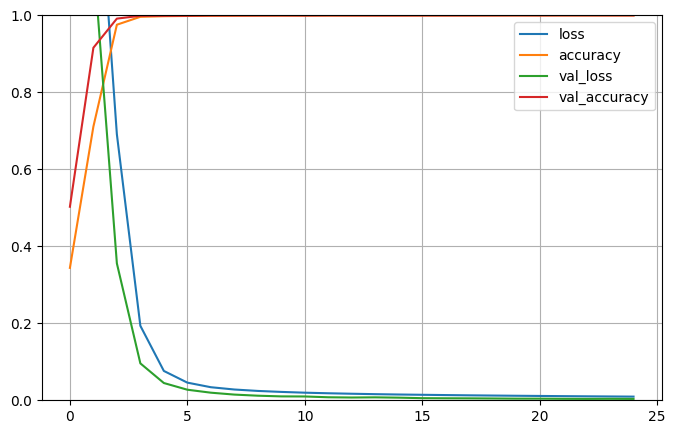

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Test the own iPhone13_I model

In [21]:
model = keras.models.load_model("/Users/Lojenaa/Documents/DELL_Linux/Lojenaa/HackRF One/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone8/iPHONE8_I_model.h5")

In [22]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 2s 4ms/step - loss: 0.0054 - accuracy: 0.9996
test loss, test acc: [0.005375926848500967, 0.9995999932289124]


In [23]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(y_pred)
print(y_pred[0])

313/313 [==============================] - 1s 4ms/step
[0 6 5 ... 5 5 6]
0


In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1010    0    0    0    0    1    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0    0  992    0    0    0    0    0    0    1]
 [   0    0    0  938    1    0    0    0    0    0]
 [   0    0    0    0 1043    0    0    0    0    0]
 [   0    0    0    0    0 1027    0    0    0    0]
 [   0    0    0    0    0    0  999    0    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    1 1000]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6       1.00      1.00      1.00       999
           7       1.00      1.00   